MultiRAT dataset description code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

This page shows the code to reproduce the figures in the manuscript in preparation. Results/figure selection is based on the analysis in the other scripts.  

In [36]:
import os
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import pandas as pd
from nilearn import plotting

# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.19/multiRat'
df_path='../assets/table/multiRat_rest_20211208.tsv'

df = pd.read_csv(df_path, sep='\t')
mm = (1/2.54)*10

sns.set_palette("colorblind")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 6

# combine jet colormap for plot_stat_map (see https://stackoverflow.com/a/31052741)
# select to color scheme to use
colors1 = plt.cm.jet(np.linspace(0., 1, 128))
colors = np.vstack((colors1, colors1))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)


# Figure 1. Dataset description.
a. Strain.  
b. Sex.   
c. Anesthesia.   
d. Field strength.   
e. Breathing rate as a function of anesthesia.  
f. Heart rate as a function of anesthesia.   
g. Repetition time as a function of sequence   
h. Echo time as a function of sequence.   

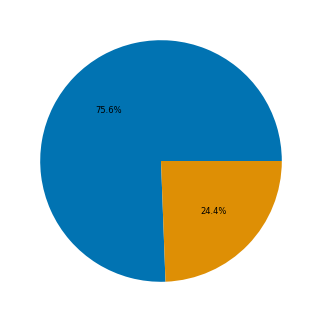

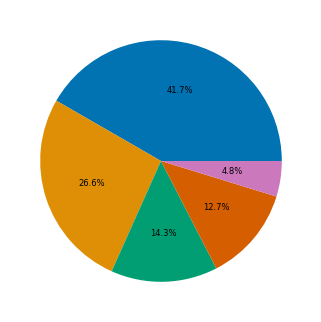

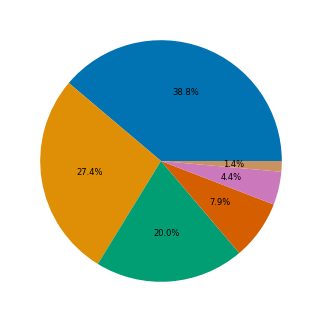

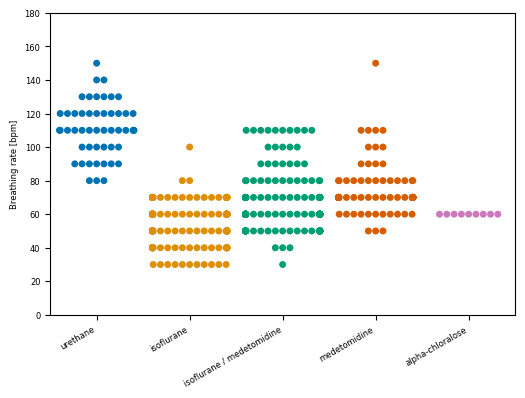

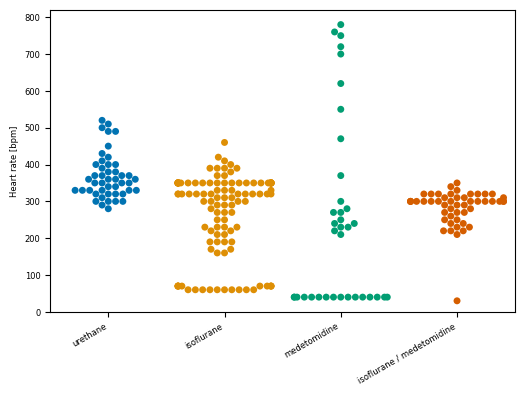

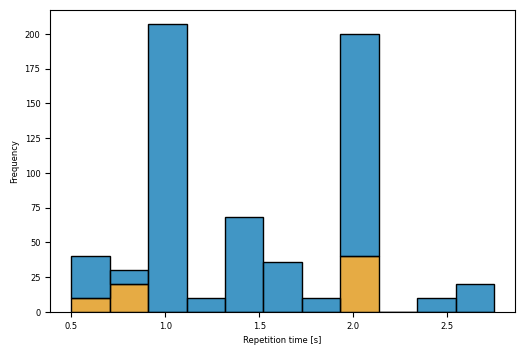

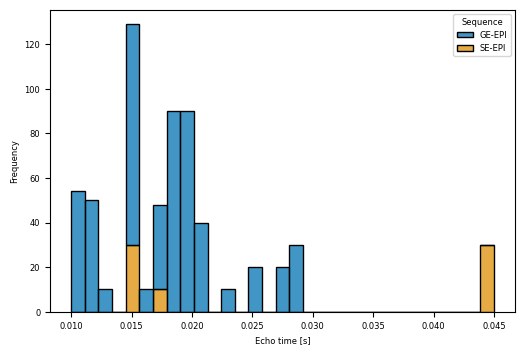

In [6]:
## Figure 1A
plt.pie(df['rat.sex'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1A.svg'), format="svg", dpi=600)
plt.show()

## Figure 1B
plt.pie(df['rat.strain'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1B.svg'), format="svg", dpi=600)
plt.show()

## Figure 1C
plt.pie(df['anesthesia.maintenance'].value_counts(), autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1C.svg'), format="svg", dpi=600)
plt.show()

## Figure 1D
df_tmp = df.dropna(subset=['anesthesia.breathing.rate'])
snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.breathing.rate", data=df_tmp)
snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
snp.set_xlabel("")
snp.set_ylabel("Breathing rate [bpm]")
snp.set(ylim=(0, 180))

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1D.svg'), format="svg", dpi=600)
plt.show()

## Figure 1E
df_tmp = df.dropna(subset=['anesthesia.heart.rate'])
snp = sns.swarmplot(x="anesthesia.maintenance", y="anesthesia.heart.rate", data=df_tmp)
snp.set_xticklabels(snp.get_xticklabels(), rotation=30, ha='right')
snp.set_xlabel("")
snp.set_ylabel("Heart rate [bpm]")
snp.set(ylim=(0, 820))

plt.savefig(os.path.join(init_folder,'assets','figure','Figure1E.svg'), format="svg", dpi=600)
plt.show()

## Figure 1F
snp = sns.histplot(data=df, x="func.TR", hue="func.sequence", multiple="stack")
snp.set_xlabel("Repetition time [s]")
snp.set_ylabel("Frequency")
snp.get_legend().remove()
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1F.svg'), format="svg", dpi=600)
plt.show()

## Figure 1G
snp = sns.histplot(data=df, x="func.TE", hue="func.sequence", multiple="stack")
snp.set_xlabel("Echo time [s]")
snp.set_ylabel("Frequency")
snp.get_legend().set_title('Sequence')
plt.savefig(os.path.join(init_folder,'assets','figure','Figure1G.svg'), format="svg", dpi=600)
plt.show()


# Figure S1. Dataset description complement
a. Age in months   
b. Weight in g   


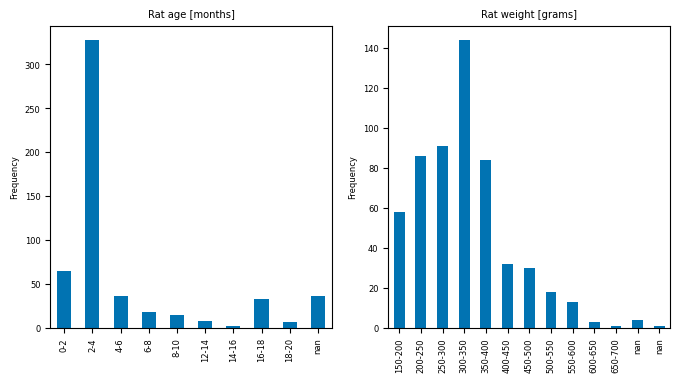

In [34]:
df_age= df['rat.age'].value_counts().rename_axis('age').reset_index(name='counts')
df_age['age'] = pd.Categorical(df_age['age'], ["0-2", "2-4", "4-6","6-8","8-10","10-12","12-14","14-16","16-18","18-20"])

df_weight= df['rat.weight'].value_counts().rename_axis('weight').reset_index(name='counts')
df_weight['weight'] = pd.Categorical(df_weight['weight'] , ["150-200", 
                                                            "200-250", 
                                                            "250-300",
                                                            "300-350",
                                                            "350-400",
                                                            "400-450",
                                                            "450-500",
                                                            "500-550",
                                                            "550-600",
                                                            "600-650",
                                                            "650-700"])


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))



ax3 = df_age.sort_values(by=['age']).plot.bar(x='age',y='counts', title='Rat age [months]',ax=axes[0])
ax4 = df_weight.sort_values(by=['weight']).plot.bar(x='weight',y='counts', title='Rat weight [grams]',ax=axes[1])

ax3.set(xlabel="", ylabel="Frequency")
ax4.set(xlabel="", ylabel="Frequency")
ax3.get_legend().remove()
ax4.get_legend().remove()

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS1.svg'), format="svg", dpi=600)
plt.show()

# Figure S2. Failed QA
a. Anatomical to template   
b. Functional to anatomical   


#### Failed anatomical to template registration

![func2anat](../assets/QC/sub-0104600_ses-1_T2w_inho_cor_registration.png)


#### Failed functional to anatomical registration

![func2anat](../assets/QC/sub-0101502_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104304_ses-1_run-1_bold_registration.png)

![func2anat](../assets/QC/sub-0104601_ses-1_run-1_bold_registration.png)

# Figure S3. tSNR
a. tSNR as a function of field strength   
b. tSNR as a function of repetition time   
c. tSNR as a function of echo time   
d. tSNR in the S1 and striatum   

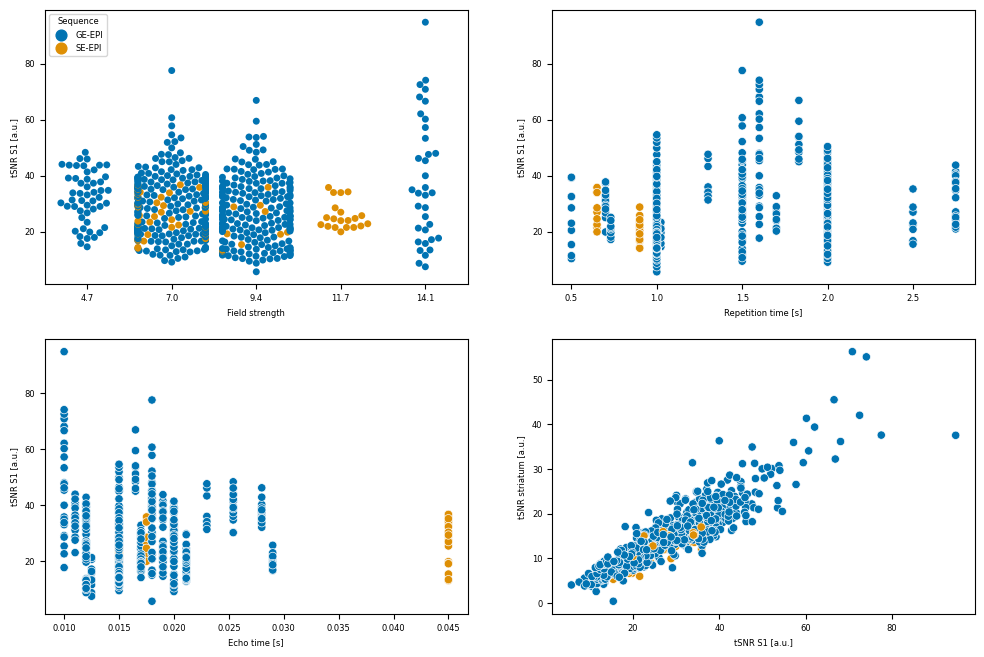

In [2]:
df_exclude = df.loc[(df['exclude'] != 'yes')]


fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8))

sns.set_palette("colorblind")


ax1 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    y="tsnr.S1", hue="func.sequence",ax=axes[0,0])
ax2 = sns.scatterplot(data=df_exclude, x="func.TR",
                    y="tsnr.S1", hue="func.sequence",ax=axes[0,1])
ax3 = sns.scatterplot(data=df_exclude, x="func.TE",
                    y="tsnr.S1", hue="func.sequence",ax=axes[1,0])
ax4 = sns.scatterplot(data=df_exclude, x="tsnr.S1",
                    y="tsnr.str", hue="func.sequence",ax=axes[1,1])

ax1.set(xlabel='Field strength', ylabel='tSNR S1 [a.u.]')
ax1.get_legend().set_title('Sequence')

ax2.set(xlabel='Repetition time [s]', ylabel='tSNR S1 [a.u.]')
ax2.get_legend().remove()

ax3.set(xlabel='Echo time [s]', ylabel='tSNR S1 [a.u.]')
ax3.get_legend().remove()

ax4.set(xlabel='tSNR S1 [a.u.]', ylabel='tSNR striatum [a.u.]')
ax4.get_legend().remove()

# Figure S4 Motion
a. Mean framewise displacement as a function of strain   
b. Mean framewise displacement as a function of anesthesia   
c. Mean framewise displacement as a function of breathing rate   
d. Mean framewise displacement as a function of maximal framewise displacement   

correlation between mean and max FW
0.5976719356349764


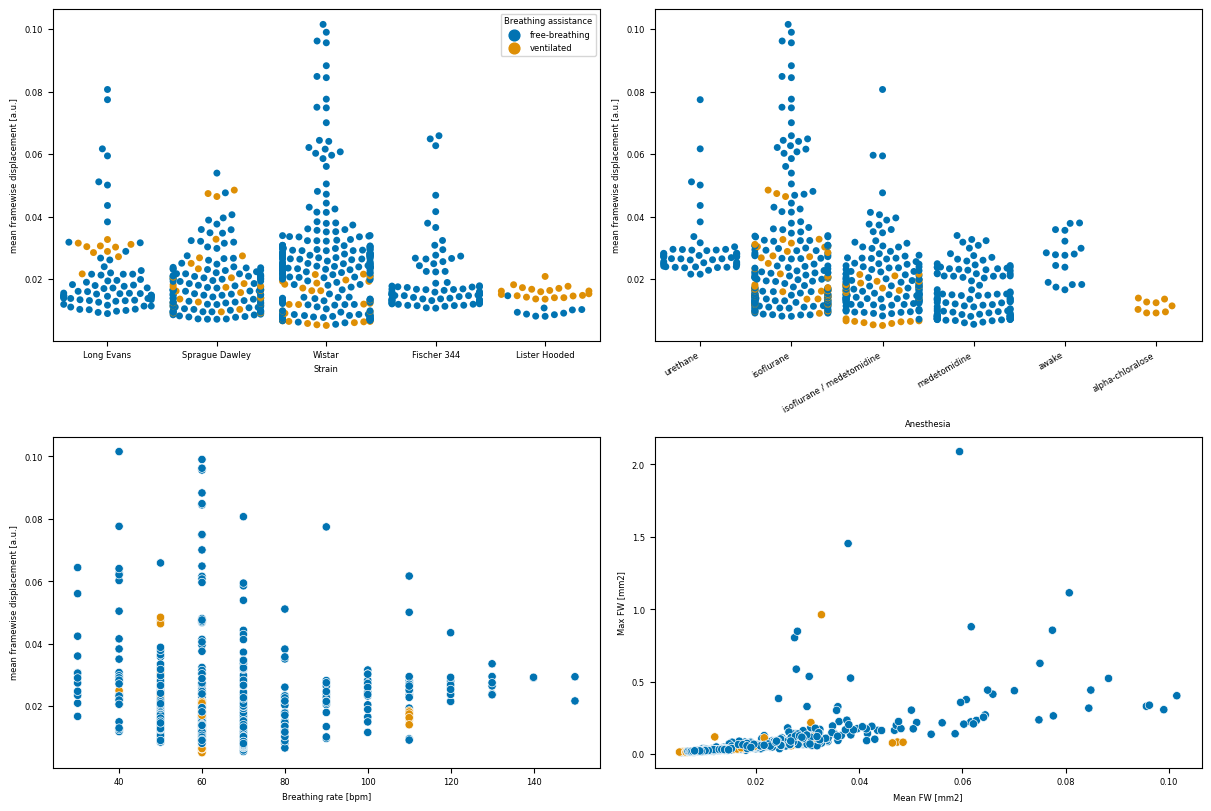

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8),constrained_layout=True)

sns.set_palette("colorblind")


ax1 = sns.swarmplot(data=df_exclude, x="rat.strain",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[0,0])
ax2 = sns.swarmplot(data=df_exclude, x="anesthesia.maintenance",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[0,1])
ax3 = sns.scatterplot(data=df_exclude, x="anesthesia.breathing.rate",
                    y="MFW", hue="anesthesia.breathing.assistance",ax=axes[1,0])
ax4 = sns.scatterplot(data=df_exclude, x="MFW",
                    y="maxFW", hue="anesthesia.breathing.assistance",ax=axes[1,1])


ax1.set(xlabel='Strain', ylabel='mean framewise displacement [a.u.]')
ax1.get_legend().set_title('Breathing assistance')

ax2.set(xlabel='Anesthesia', ylabel='mean framewise displacement [a.u.]')
ax2.get_legend().remove()
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=30, ha='right')

ax3.set(xlabel='Breathing rate [bpm]', ylabel='mean framewise displacement [a.u.]')
ax3.get_legend().remove()

ax4.set(xlabel='Mean FW [mm2]', ylabel='Max FW [mm2]')
ax4.get_legend().remove()

print('correlation between mean and max FW')
print(df_exclude[['MFW','maxFW']].corr().iloc[0,1])



# Figure 2 Seed-based analysis
a. Diagram illustrating the logic behind FC specificity   
b. FC relative to specific and unspecific ROI, along with example images.    
c. FC specificity as a function of nuisance regression   
d. FC incidence map   
e. test-retest   

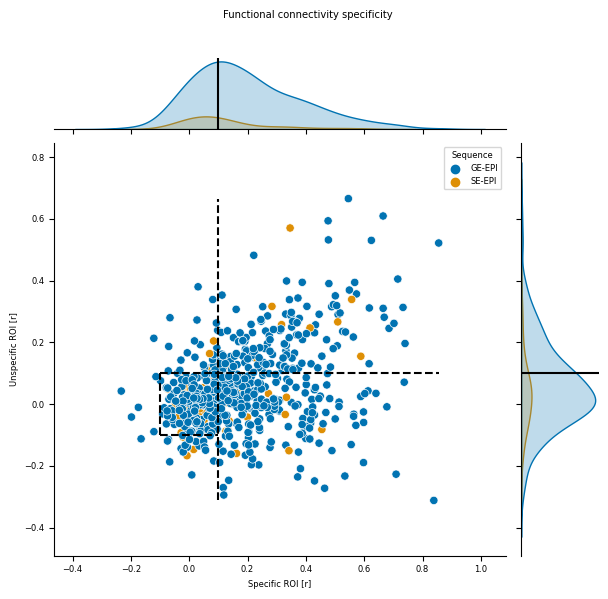

In [12]:
## Figure 2B
ax6 = sns.jointplot(data=df_exclude, x='WMCSFs_S1bf_S1bf', y='WMCSFs_S1bf_ACA', hue='func.sequence')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['WMCSFs_S1bf_ACA']),ymax=max(df_exclude['WMCSFs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['WMCSFs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

plt.savefig(os.path.join(init_folder,'assets','figure','Figure2B_WMCSFs.svg'), format="svg", dpi=600)
plt.show()

In [31]:
## Figure 2B complement

bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')


seed_list = glob.glob((os.path.join(analysis_folder, 'export', 'seed','*'))+'/*')
#only keep WMCSFs seed maps
r = re.compile('/WMCSFs/')
seed_list_sub=list(filter(r.findall, seed_list))
# only keep S1bf seed maps
r = re.compile('S1bf')
seed_list_sub=list(filter(r.findall, seed_list_sub))

# keep specific example
r = re.compile('104608')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Specific FC, ID: 104608 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_specific.svg'))

# keep unspecific example
r = re.compile('102102')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Unspecific FC, ID: 102102 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_unspecific.svg'))

# keep no example
r = re.compile('104307')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='No FC, ID: 104307 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_no.svg'))

# keep Spurious example
r = re.compile('102506')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Spurious FC, ID: 102506 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Figure2B_spurious.svg'))


In [ ]:
from nilearn import plotting
bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')

import re
df_specific = df_exclude[['rat.sub','rat.ses']][df_exclude['rat.sub']==104608][df_exclude['rat.sub']==104608]

for i in list(range(0,df_specific.shape[0])):
    r = re.compile('/WMCSFs/')
    seed_list_sub=list(filter(r.findall, seed_list))
    r = re.compile('S1bf')
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile(df_specific['rat.sub'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))
    r = re.compile('ses-'+df_specific['rat.ses'].iloc[i].astype(str))
    seed_list_sub=list(filter(r.findall, seed_list_sub))


    plotting.plot_stat_map(seed_list_sub[0], 
                           bg_img, 
                           title='Specific FC, ID:'+
                                df_specific['rat.sub'].iloc[i].astype(str)+
                                ' ses: '+
                                df_specific['rat.ses'].iloc[i].astype(str),
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5))

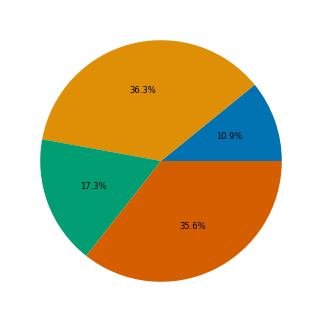

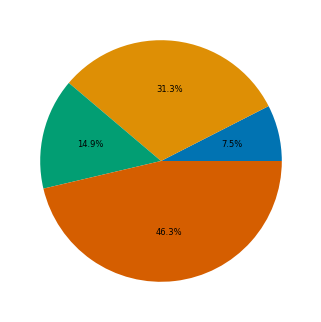

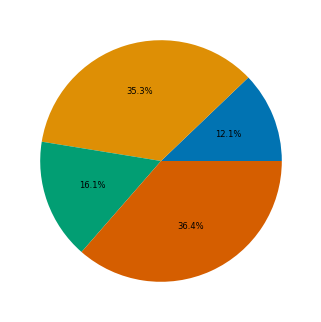

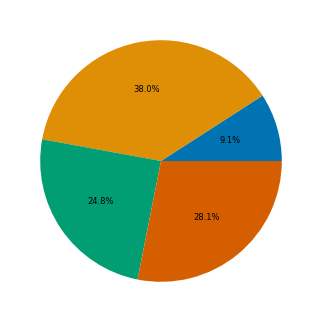

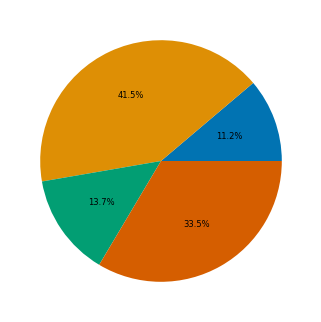

In [10]:
## Figure 2C
plt.pie(df_exclude['aromas_S1bf_cat'].value_counts(sort=False),autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C_aromas.svg'), format="svg", dpi=600)
plt.show()

plt.pie(df_exclude['aromal_S1bf_cat'].value_counts(sort=False),autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C_aromal.svg'), format="svg", dpi=600)
plt.show()

plt.pie(df_exclude['aromasr_S1bf_cat'].value_counts(sort=False),autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C_aromasr.svg'), format="svg", dpi=600)
plt.show()

plt.pie(df_exclude['WMCSFs_S1bf_cat'].value_counts(sort=False),autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C_WMCSFs.svg'), format="svg", dpi=600)
plt.show()

plt.pie(df_exclude['GSRs_S1bf_cat'].value_counts(sort=False),autopct="%.1f%%")
plt.savefig(os.path.join(init_folder,'assets','figure','Figure2C_GSRs.svg'), format="svg", dpi=600)
plt.show()

In [40]:
seed_group = ['S1bf','ACA', 'CPu','MOp']
y_stack = [0.14, 2.2, 1.6, 3.1]
output_incidence = os.path.join(analysis_folder, 'export', 'group_SBA_incidence')

seed_list = glob.glob(
    (os.path.join(analysis_folder, 'export', 'group_SBA'))+'/*')

for count,seed in enumerate(seed_group):

    r = re.compile(seed)
    seed_list_sub = list(filter(r.findall, seed_list))

    filename_export = "seed-"+seed+'.nii.gz'
    filename_path = os.path.join(analysis_folder, 'export', output_incidence, filename_export)


    ma_img =  os.path.join(analysis_folder, 'export', output_incidence, filename_export)


    plotting.plot_stat_map(ma_img,
              bg_img,
              title='Indicence map, seed: ' + seed + ', n = '+ str(len(seed_list_sub)),
              threshold=0.2,
             vmax=1,
              symmetric_cbar=False,
              cmap=mymap,
              black_bg=False,
              # display_mode="y",
              cut_coords=(0,  y_stack[count], 5),
              output_file=os.path.join(init_folder,'assets','figure','Figure2C_'+seed+'.svg'))

# Figure S5 FC specificity
a. FC relative to specific and unspecific ROI, along with example images.    

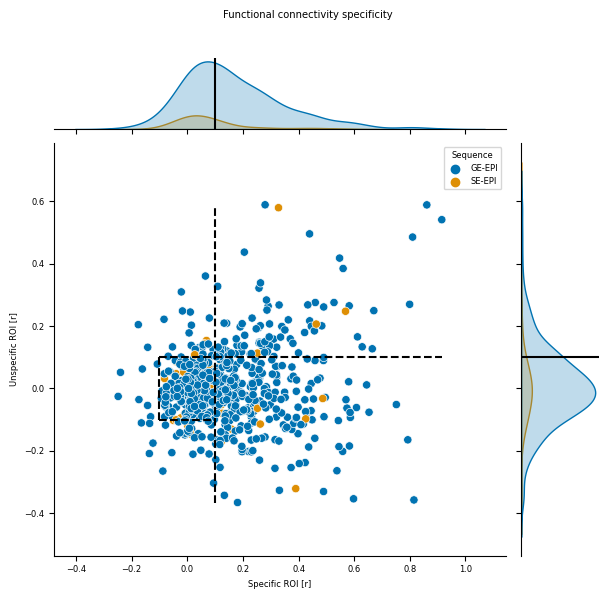

In [14]:
## Figure S5A
ax6 = sns.jointplot(data=df_exclude, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA', hue='func.sequence')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.get_legend().set_title('Sequence')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['GSRs_S1bf_ACA']),ymax=max(df_exclude['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')

plt.savefig(os.path.join(init_folder,'assets','figure','Sup_FigureS5_GSRs.svg'), format="svg", dpi=600)
plt.show()

In [41]:
## Figure 2B complement

bg_img=os.path.join(analysis_folder, 
             'template',
             'SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1',
             'SIGMA_Rat_Anatomical_Imaging',
            'SIGMA_Rat_Anatomical_InVivo_Template',
            'SIGMA_InVivo_Brain_Template_Masked.nii')


seed_list = glob.glob((os.path.join(analysis_folder, 'export', 'seed','*'))+'/*')
#only keep WMCSFs seed maps
r = re.compile('/GSRs/')
seed_list_sub=list(filter(r.findall, seed_list))
# only keep S1bf seed maps
r = re.compile('S1bf')
seed_list_sub=list(filter(r.findall, seed_list_sub))

# keep specific example
r = re.compile('104608')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Specific FC, ID: 104608 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_specific.svg'))

# keep unspecific example
r = re.compile('102102')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Unspecific FC, ID: 102102 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_unspecific.svg'))

# keep no example
r = re.compile('104307')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='No FC, ID: 104307 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_no.svg'))

# keep Spurious example
r = re.compile('102506')
seed_list_sub_select=list(filter(r.findall, seed_list_sub))
r = re.compile('ses-1')
seed_list_sub_specific=list(filter(r.findall, seed_list_sub_select))
plotting.plot_stat_map(seed_list_sub_select[0], 
                           bg_img, 
                           title='Spurious FC, ID: 102506 ses: 1',
                           threshold=0.1,
                           vmax=0.5,
                           symmetric_cbar=True,
                           cmap='coolwarm',
                           black_bg=False,
                           #display_mode="y",
                           cut_coords=(0,0.14,5),
                           output_file=os.path.join(init_folder,'assets','figure','Sup_FigureS5_spurious.svg'))

# Figure S6 FC incidence other seeds 
see Figure2C_MOP, CPu, ACA

# Figure 3 Standard rat
a. Breathing rate   
b. Heart rate   
c. Mean framewise displacement   
d. tSNR   
e. FC specificity   
f. FC incidence map   

# Figure 4 Independent component analysis
ICA components, incl labels from the SIGMA atlas. 

# Figure S7 Standard rat group SBA maps